**Libraries and variables**

In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

n = 240
v = 441
nsrcs = 6
x1 = 21
x2 = 21

**Question 1.1**

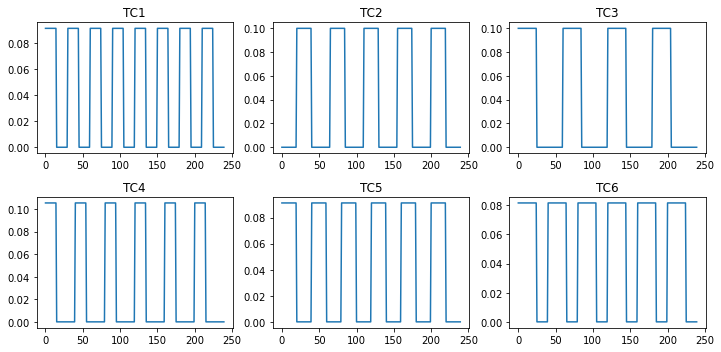

In [2]:
av = [0, 20, 0, 0, 0, 0]
iv = [30, 45, 60, 40, 40, 40]
ones = [15, 20, 25, 15, 20, 25]

temporal_sources = []
temporal_sources_normalised = []
temporal_sources_standardised = []
for i in range(nsrcs):
    arrival = np.zeros(av[i])
    after_arrival = np.resize(np.concatenate((np.ones(ones[i]), 
                                                    np.zeros(iv[i]-ones[i]))),
                              n - av[i])
    this_tc = np.concatenate((arrival, after_arrival))
    
    tc_mean = np.mean(this_tc)
    tc_std = np.std(this_tc)
    tc_norm = np.linalg.norm(this_tc)
    
    temporal_sources_normalised.append(this_tc/tc_norm)
    this_tc_standardised = (this_tc - tc_mean)/tc_std
    temporal_sources_standardised.append(this_tc_standardised)


fig, axes = plt.subplots(2, 3, figsize = (10, 5))
for i in range(3):
    axes[0,i].plot(temporal_sources_normalised[i])
    axes[1,i].plot(temporal_sources_normalised[i + 3])
    axes[0,i].set_title('TC' + str(i+1))
    axes[1,i].set_title('TC' + str(i+4))
plt.tight_layout()
    
plt.savefig('Source_TCs.png')

**Question 1.2**

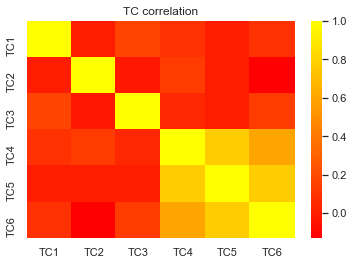

In [5]:
TC = np.transpose(np.vstack(temporal_sources_standardised))

fig, axes = plt.subplots()
sns.set()
sns.heatmap(pd.DataFrame(TC).corr(), cmap = 'autumn',
            xticklabels = ('TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6'),
           yticklabels = ('TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6'), 
            ax = axes)
axes.set_title('TC correlation')
plt.savefig('TC_correlation.png')

**Question 1.3**

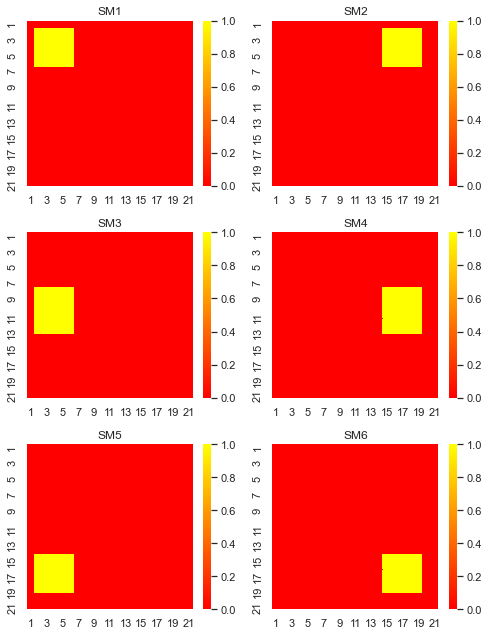

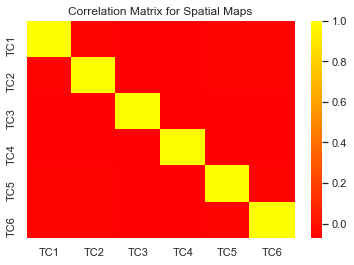

In [6]:
tmpSM = np.zeros((6, 21, 21), dtype = int)

# Each index is -1 than the given index in the specification, since Python 
# starts indexing at 0, not 1
tmpSM_vertical_start = [1, 1, 7, 7, 14, 14]
tmpSM_vertical_end = [5, 5, 12, 12, 18, 18]
tmpSM_horizontal_start = [1, 14, 1, 14, 1, 14]
tmpSM_horizontal_end = [5, 18, 5, 18, 5, 18]

for i in range(nsrcs):
    tmpSM[i, tmpSM_vertical_start[i]:tmpSM_vertical_end[i]+1, 
            tmpSM_horizontal_start[i]:tmpSM_horizontal_end[i]+1] = 1

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (7, 9))
SM_column_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
                        '12', '13', '14', '15', '16', '17', '18', '19', '20',
                        '21']

for i in range(nsrcs):
    tmpSM_df = pd.DataFrame(tmpSM[i])
    tmpSM_df.index = tmpSM_df.index + 1
    tmpSM_df.columns =  SM_column_names
    sns.heatmap(pd.DataFrame(tmpSM_df), cmap = 'autumn', ax = axes.flat[i])
    axes.flat[i].set_title("SM" + str(i+1))
plt.tight_layout()
plt.savefig("Source_SMs.png")

for i in range(nsrcs):
    tmpSM[i] = np.transpose(tmpSM[i])

SM = np.reshape(tmpSM, (6, 441))
SM_df = pd.DataFrame(SM)
SM_df.index = SM_df.index + 1

fig2, axes2 = plt.subplots()
sns.heatmap(SM_df.transpose().corr(), cmap = 'autumn',
            xticklabels = ('TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6'),
           yticklabels = ('TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6'), 
            ax = axes2)
axes2.set_title("Correlation Matrix for Spatial Maps")
plt.savefig("SM_correlation.png")

/Users/gabbimackechnie/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gabbimackechnie/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


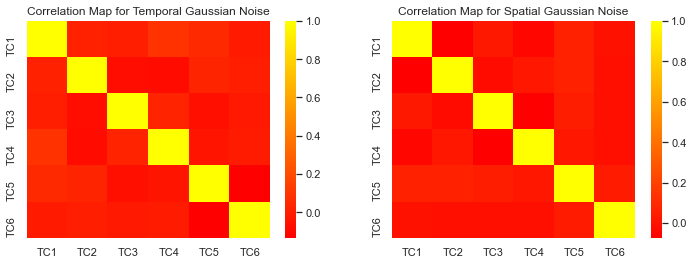

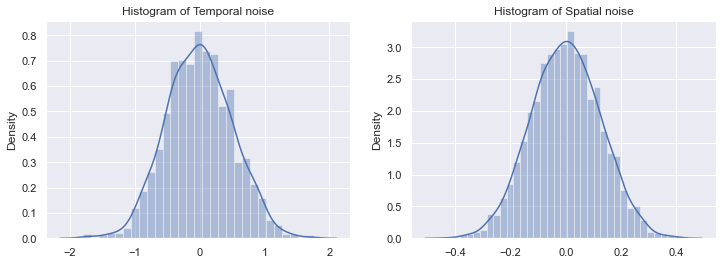

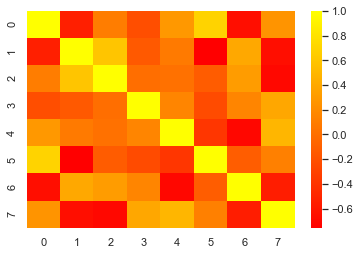

In [7]:
from math import sqrt

temporal_mean = 0
spatial_mean = 0

temporal_variance = 0.25
spatial_variance = 0.015

def generate_temporal_noise(mean, variance):
    TC_noise = np.random.normal(mean, sqrt(variance), size = (240, 6))
    return TC_noise

def generate_spatial_noise(mean, variance):
    SM_noise = np.random.normal(mean, sqrt(variance), size = (6, 441))
    return SM_noise

# Generate some noise
temporal_noise = generate_temporal_noise(temporal_mean, temporal_variance)
spatial_noise = generate_spatial_noise(spatial_mean, spatial_variance)

# Generate Correlation Maps for each
fig, axes = plt.subplots(1, 2, figsize = (12, 4))
sns.heatmap(pd.DataFrame(temporal_noise).corr(), cmap = 'autumn',
            xticklabels = ('TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6'),
           yticklabels = ('TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6'),
            ax = axes[0])
axes[0].set_title("Correlation Map for Temporal Gaussian Noise")

spatial_noise_T = np.transpose(spatial_noise)
sns.heatmap(pd.DataFrame(spatial_noise_T).corr(), cmap = 'autumn',
            xticklabels = ('TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6'),
           yticklabels = ('TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6'),
            ax = axes[1])
axes[1].set_title("Correlation Map for Spatial Gaussian Noise")
plt.savefig("Noise_individual_correlation.png")

# Plot the histograms of each
fig2, axes2 = plt.subplots(1, 2, figsize = (12, 4))
sns.distplot(temporal_noise, ax = axes2[0])
axes2[0].set_title("Histogram of Temporal noise")
sns.distplot(spatial_noise, ax = axes2[1])
axes2[1].set_title("Histogram of Spatial noise")
plt.savefig("Noise_histograms.png")

# Calculating the matrix product of temporal and spatial noise, and looking for 
# correlation.
product = np.matmul(temporal_noise, spatial_noise)
fig3, axes3 = plt.subplots()
sns.heatmap(pd.DataFrame(product).corr().iloc[0:8, 0:8], cmap = 'autumn')
plt.savefig("Noise_product_correlation.png")

**Question 1.5**

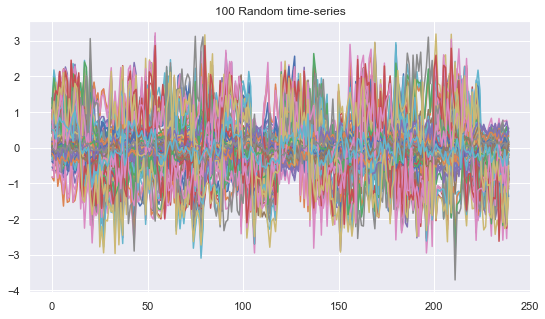

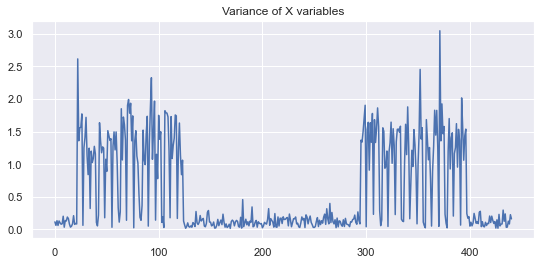

In [8]:
#import statistics

def generate_X(TC, TC_noise, SM, SM_noise):
    X = np.matmul(np.add(TC, TC_noise), np.add(SM, SM_noise))
    return X

# Generate X
X = generate_X(TC, temporal_noise, SM, spatial_noise)
X_df = pd.DataFrame(X)

# Plotting 100 randomly selected time-series (variables) from X
X_random = X_df.sample(n = 100, axis = 'columns')
fig, axes = plt.subplots(figsize = (9, 5))
axes.plot(range(n), X_random)
axes.set_title("100 Random time-series")
plt.savefig("X_random.png")

# Plotting the variance of all 441 variables
fig2, axes2 = plt.subplots(figsize = (9, 4))
axes2.plot(range(v), X.var(axis = 0))
axes2.set_title("Variance of X variables")
plt.savefig("X_variance.png")

def standardise_X(X, new_X):
    for i in range(441):
        this_mean = np.mean(X[:,i], axis = 0)
        this_std = np.std(X[:,i], axis = 0)
        new_X[:,i] = (X[:,i] - this_mean)/this_std
    return new_X

empty_X = np.zeros((n, v))
X_standard = standardise_X(X, empty_X)

**Question 2.1**

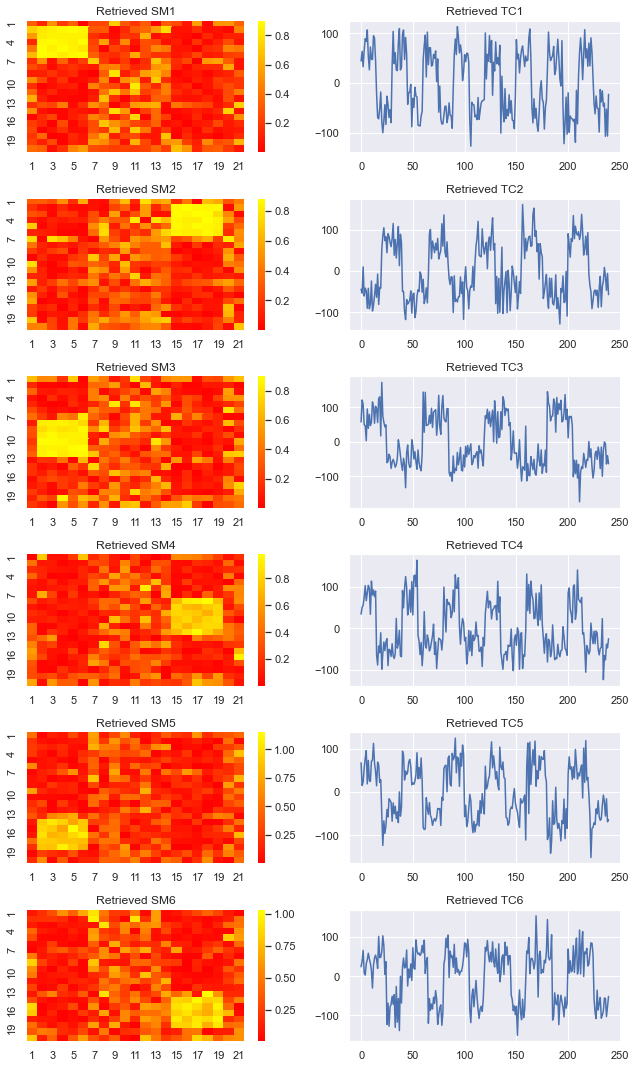

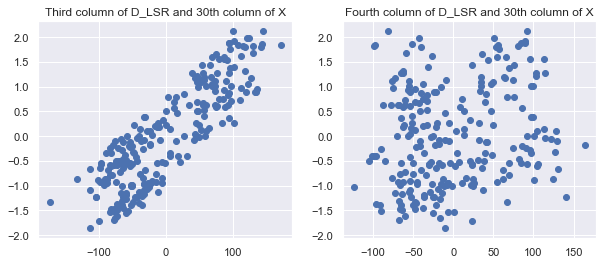

In [9]:
## Retrieval of SMs
A_LSR_term1 = np.linalg.inv(np.matmul(np.transpose(TC), TC))
A_LSR = np.matmul(A_LSR_term1, 
                  (np.matmul(np.transpose(TC), X_standard)))

D_LSR = np.matmul(X_standard, np.transpose(A_LSR))

A_LSR = np.abs(A_LSR)

A_LSR_reshape = np.reshape(A_LSR, (6, 21, 21))
for i in range(nsrcs):
    A_LSR_reshape[i] = np.transpose(A_LSR_reshape[i])

fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (9, 15))
for i in range(nsrcs):
    A_LSR_df = pd.DataFrame(A_LSR_reshape[i], columns = SM_column_names)
    A_LSR_df.index = A_LSR_df.index + 1
    sns.heatmap(A_LSR_df, cmap = 'autumn', ax = axes[i,0])
    axes[i,0].set_title("Retrieved SM" + str(i+1))
    axes[i,1].plot(range(n), D_LSR[:,i])
    axes[i,1].set_title("Retrieved TC" + str(i+1))
plt.tight_layout()
plt.savefig("SM_TC_retrieval")


fig2, axes2 = plt.subplots(1, 2, figsize = (10, 4))

axes2[0].scatter(D_LSR[:,2], X_standard[:,29])
axes2[0].set_title("Third column of D_LSR and 30th column of X")
axes2[1].scatter(D_LSR[:,3], X_standard[:,29])
axes2[1].set_title("Fourth column of D_LSR and 30th column of X")
plt.savefig("DLSR_vs_X.png")

**Question 2.2**

The sum of maximum absolute correlations in D_LSR is:  5.240744412828276
The sum of maximum absolute correlations in D_RR is:  5.3863486779001555


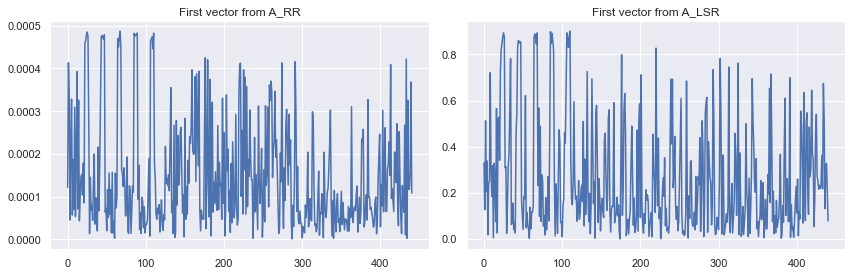

In [12]:
lambda_est = 0.9
lambda_tilde = lambda_est * v
A_RR_first = np.linalg.inv(np.add(np.matmul(np.transpose(TC), TC),
                                  lambda_tilde * np.identity(6)))

A_RR = np.matmul(A_RR_first, np.matmul(np.transpose(TC), X_standard))

D_RR = np.matmul(X_standard, np.transpose(A_RR))

corr_TLSR = np.zeros((nsrcs, nsrcs))
corr_TRR = np.zeros((nsrcs, nsrcs))
for i in range(nsrcs):
    for j in range(nsrcs):
        corr_TLSR[i,j] = pd.Series(TC[:,i]).corr(pd.Series(D_LSR[:,j]))
        corr_TRR[i,j] = pd.Series(TC[:,i]).corr(pd.Series(D_RR[:,j]))
        
# Retain only the maximum absolute correlations
corr_TLSR  = np.absolute(corr_TLSR)
c_TLSR = [np.max(row) for row in corr_TLSR]
corr_TRR  = np.absolute(corr_TRR)
c_TRR = [np.max(row) for row in corr_TRR]

# Calculating the sum of each
sum_TLSR = sum(c_TLSR)
sum_TRR = sum(c_TRR)

print("The sum of maximum absolute correlations in D_LSR is: ", sum_TLSR)
print("The sum of maximum absolute correlations in D_RR is: ", sum_TRR)

# plotting theâ€€first vector from ARR and the corresponding vector from ALSR,
# with lambda = 1000
lambda_est = 1000
lambda_tilde = lambda_est * v

A_RR_first = np.linalg.inv(np.add(np.matmul(np.transpose(TC), TC),
                                  lambda_tilde * np.identity(6)))

A_RR = np.abs(np.matmul(A_RR_first, np.matmul(np.transpose(TC), X_standard)))

fig2, axes2 = plt.subplots(1, 2, figsize = (12, 4))
axes2[0].plot(range(v), A_RR[0])
axes2[0].set_title("First vector from A_RR")
axes2[1].plot(range(v), A_LSR[0])
axes2[1].set_title("First vector from A_LSR")
plt.tight_layout()
plt.savefig("ARR_ALSR_first_vector.png")



**Question 2.3**

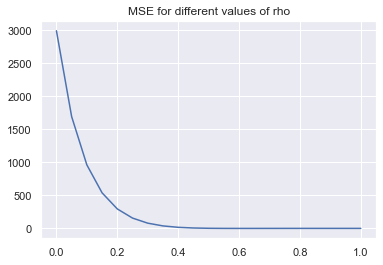

In [13]:
all_mses = []
for i in range(10):
    new_temporal_noise = generate_temporal_noise(temporal_mean, 
                                                 temporal_variance)
    new_spatial_noise = generate_spatial_noise(spatial_mean, spatial_variance)
    X = generate_X(TC, new_temporal_noise, SM, new_spatial_noise)
    empty_X = np.zeros((n, v))
    new_standard_X = standardise_X(X, empty_X)
    
    realisation_mses = []
    for rho in np.arange(0.0, 1.05, 0.05):
        step = 1/((np.linalg.norm(np.matmul(TC,
                                           np.transpose(TC)), ord = 1)) * 1.1)
        thr = rho * n * step
        Ao = np.zeros((nsrcs))
        A = np.zeros((nsrcs))
        Alr = np.zeros((nsrcs, x1 * x2))
        for k in range(x1 * x2):
            A = Ao + (step * np.matmul(np.transpose(TC), (new_standard_X[:,k] - 
                                                          np.matmul(TC, Ao))))
            A = (1/(1 + thr)) * np.multiply(np.sign(A),
                                            np.maximum(np.zeros(A.shape), 
                                                       np.abs(A) - thr))
            for i in range(10):
                Ao = A
                A = Ao + (step * np.matmul(np.transpose(TC),
                                           (new_standard_X[:,k] - 
                                            np.matmul(TC, Ao))))
                A = (1/(1 + thr)) * np.multiply(np.sign(A),
                                        np.maximum(np.zeros(A.shape), 
                                                   np.abs(A) - thr))
            Alr[:,k] = A
    
        Dlr = np.matmul(new_standard_X, np.transpose(Alr))
        this_mse = (sum(sum((new_standard_X - np.matmul(Dlr, Alr))**2)))/(n * v)
        realisation_mses.append(this_mse)
    all_mses.append(realisation_mses)

average_mses = (np.array(all_mses)).mean(axis = 0)
    
fig, axes = plt.subplots()
axes.plot(np.arange(0.0, 1.05, 0.05), average_mses)
axes.set_title("MSE for different values of rho")
plt.savefig("MSE_plot.png")

**Question 2.4**

The sum of maximum absolute correlations in D_RR is:  5.3863486779001555
The sum of maximum absolute correlations in D_LR is:  5.422411916474975
The sum of maximum absolute correlations in A_RR is:  3.0457874069184196
The sum of maximum absolute correlations in A_LR is:  5.056342349956466


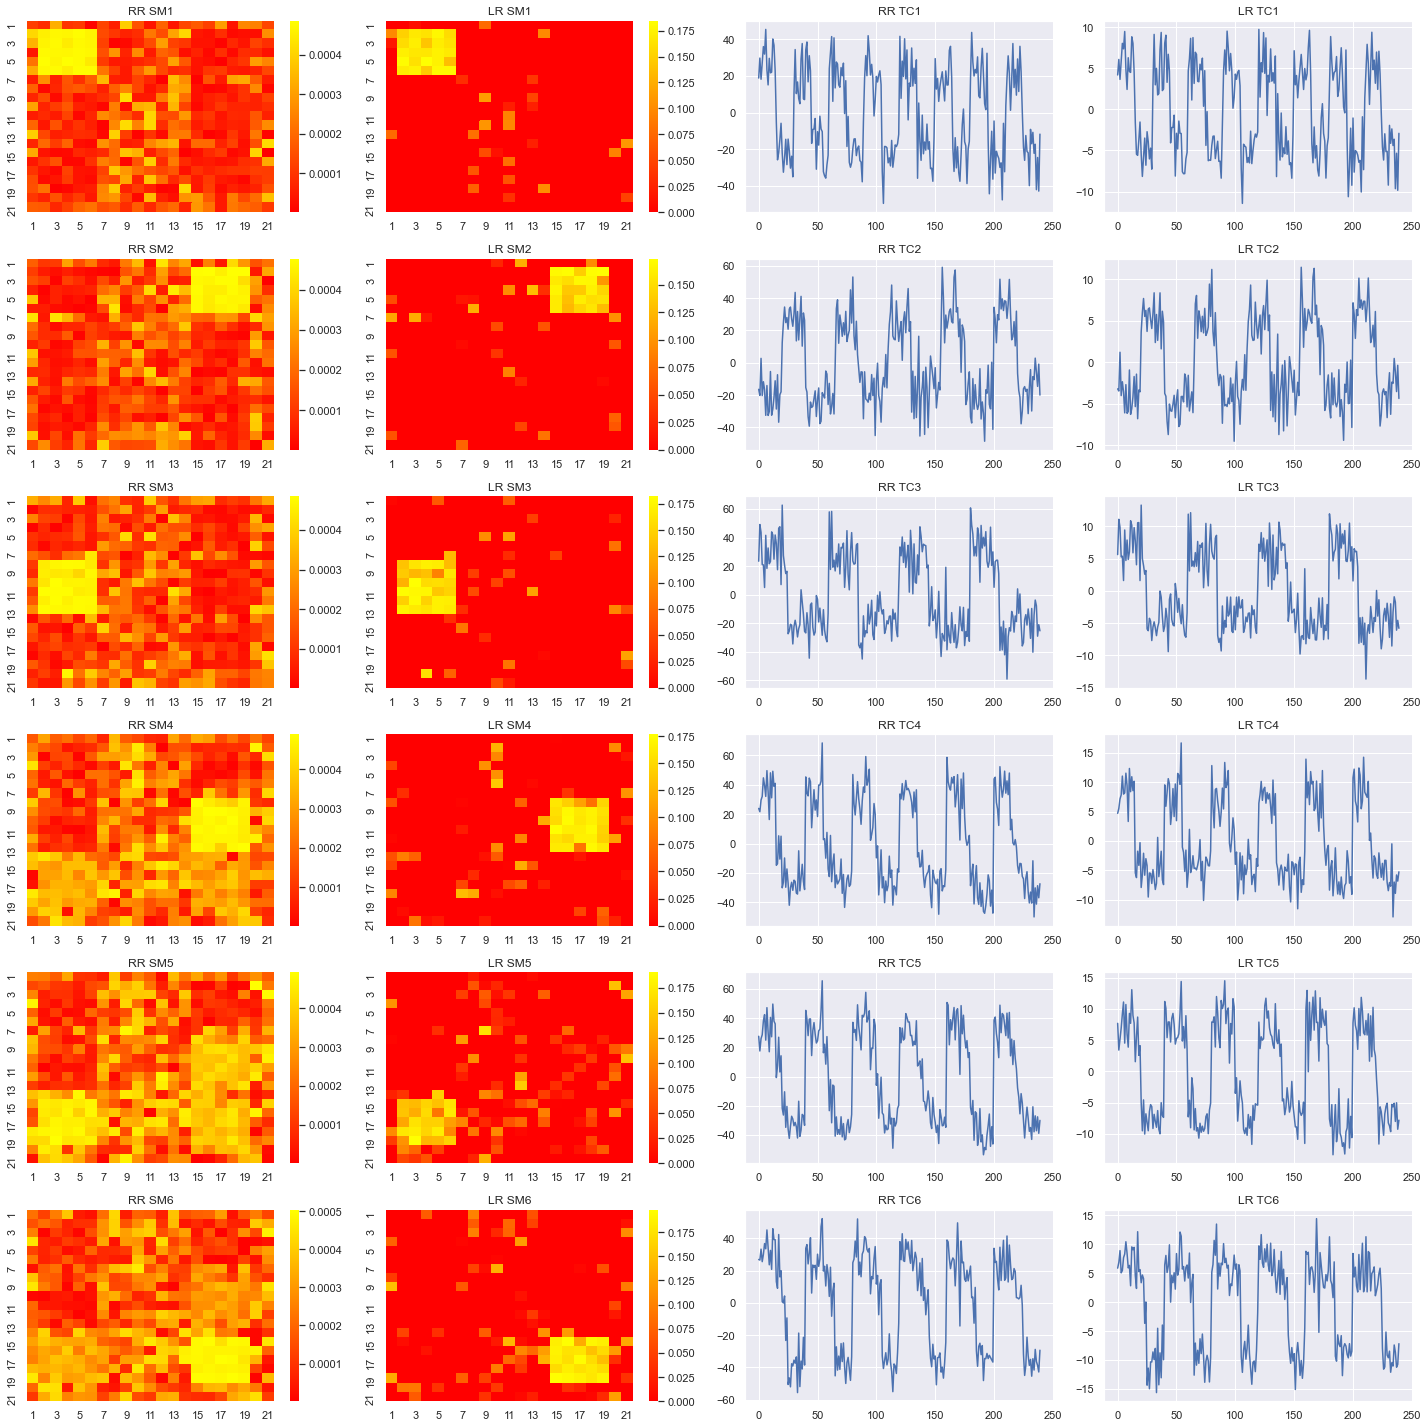

In [14]:
rho = 0.6
step = 1/((np.linalg.norm(np.matmul(TC, np.transpose(TC)), ord = 1)) * 1.1)
thr = rho * n * step
Ao = np.zeros((nsrcs))
A = np.zeros((nsrcs))
        
Alr = np.zeros((nsrcs, x1 * x2))
for k in range(x1 * x2):
    # starting A (this one) is the same regardless of rho
    A = Ao + (step * np.matmul(np.transpose(TC), (X_standard[:,k] - 
                                                  np.matmul(TC, Ao))))
    A = (1/(1 + thr)) * np.multiply(np.sign(A),
                                 np.maximum(np.zeros(A.shape), np.abs(A) - thr))
    for i in range(10):
        Ao = A
        A = Ao + (step * np.matmul(np.transpose(TC), (X_standard[:,k] - 
                                                      np.matmul(TC, Ao))))
        A = (1/(1 + thr)) * np.multiply(np.sign(A),
                                        np.maximum(np.zeros(A.shape), np.abs(A) - thr))
    Alr[:,k] = A
Dlr = np.matmul(X_standard, np.transpose(Alr))

this_mse = (sum(sum((X_standard - np.matmul(Dlr, Alr))**2)))/(n * v)

corr_TRR = np.zeros((nsrcs, nsrcs))
corr_SRR = np.zeros((nsrcs, nsrcs))
corr_TLR = np.zeros((nsrcs, nsrcs))
corr_SLR = np.zeros((nsrcs, nsrcs))

for i in range(nsrcs):
    for j in range(nsrcs):
        corr_TRR[i,j] = pd.Series(TC[:,i]).corr(pd.Series(D_RR[:,j]))
        corr_SRR[i,j] = pd.Series(SM[i,:]).corr(pd.Series(A_RR[j,:]))
        
        corr_TLR[i,j] = pd.Series(TC[:,i]).corr(pd.Series(Dlr[:,j]))
        corr_SLR[i,j] = pd.Series(SM[i,:]).corr(pd.Series(Alr[j,:]))

# Retain only the maximum absolute correlations
corr_TRR  = np.absolute(corr_TRR)
c_TRR = [np.max(row) for row in corr_TRR]
corr_SRR  = np.absolute(corr_SRR)
c_SRR = [np.max(row) for row in corr_SRR]
corr_TLR  = np.absolute(corr_TLR)
c_TLR = [np.max(row) for row in corr_TLR]
corr_SLR  = np.absolute(corr_SLR)
c_SLR = [np.max(row) for row in corr_SLR]

# Calculating the sum of each
sum_TRR = sum(c_TRR)
sum_SRR = sum(c_SRR)
sum_TLR = sum(c_TLR)
sum_SLR = sum(c_SLR)

print("The sum of maximum absolute correlations in D_RR is: ", sum_TRR)
print("The sum of maximum absolute correlations in D_LR is: ", sum_TLR)
print("The sum of maximum absolute correlations in A_RR is: ", sum_SRR)
print("The sum of maximum absolute correlations in A_LR is: ", sum_SLR)

fig, axes = plt.subplots(nrows = 6, ncols = 4, figsize = (20, 20))
SM_column_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
                        '12', '13', '14', '15', '16', '17', '18', '19', '20',
                        '21']

# Taking the absolute value for simplicity of plotting
A_RR = np.abs(A_RR)
A_LR = np.abs(Alr)

A_RR_reshape = np.reshape(A_RR, (6, 21, 21))
A_LR_reshape = np.reshape(A_LR, (6, 21, 21))

A_RR_transpose = np.zeros((nsrcs, 21, 21))
A_LR_transpose = np.zeros((nsrcs, 21, 21))
for i in range(nsrcs):
    A_RR_transpose[i] = np.transpose(A_RR_reshape[i])
    A_LR_transpose[i] = np.transpose(A_LR_reshape[i])
    
    A_RR_df = pd.DataFrame(A_RR_transpose[i], columns = SM_column_names)
    A_LR_df = pd.DataFrame(A_LR_transpose[i], columns = SM_column_names)
    
    A_RR_df.index = A_RR_df.index + 1
    A_LR_df.index = A_LR_df.index + 1
    
    sns.heatmap(A_RR_df, cmap = 'autumn', ax = axes[i,0])
    sns.heatmap(A_LR_df, cmap = 'autumn', ax = axes[i,1])
    
    axes[i,0].set_title("RR SM" + str(i+1))
    axes[i,1].set_title("LR SM" + str(i+1))
    
    axes[i,2].plot(range(n), D_RR[:,i])
    axes[i,2].set_title("RR TC" + str(i+1))
    axes[i,3].plot(range(n), Dlr[:,i])
    axes[i,3].set_title("LR TC" + str(i+1))
    
plt.tight_layout()
plt.savefig("RR_vs_Lasso.png")
        

**Question 2.5**

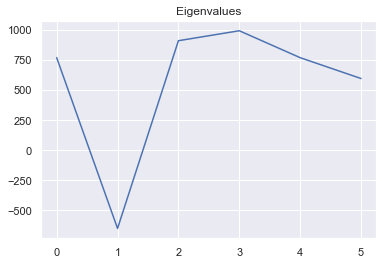

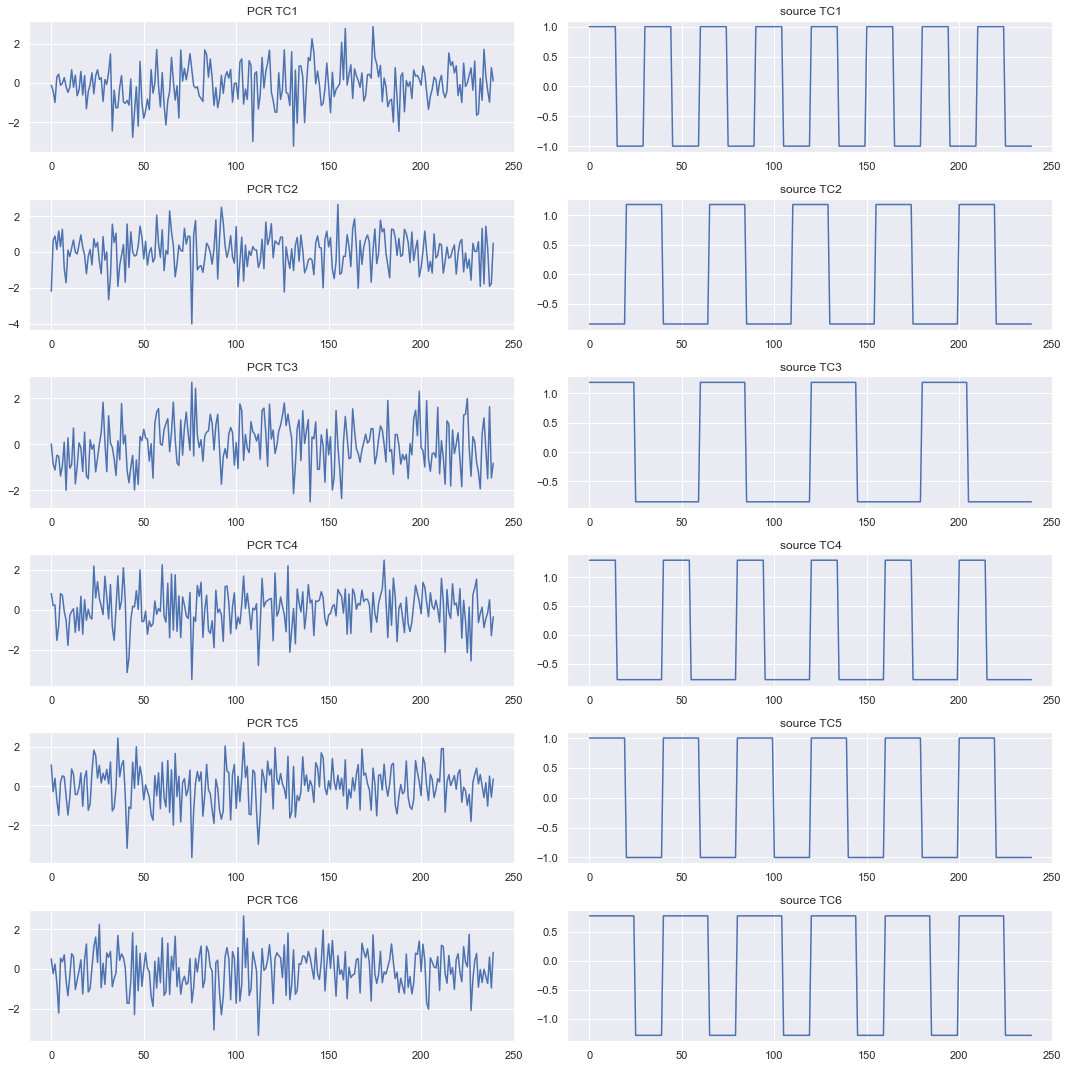

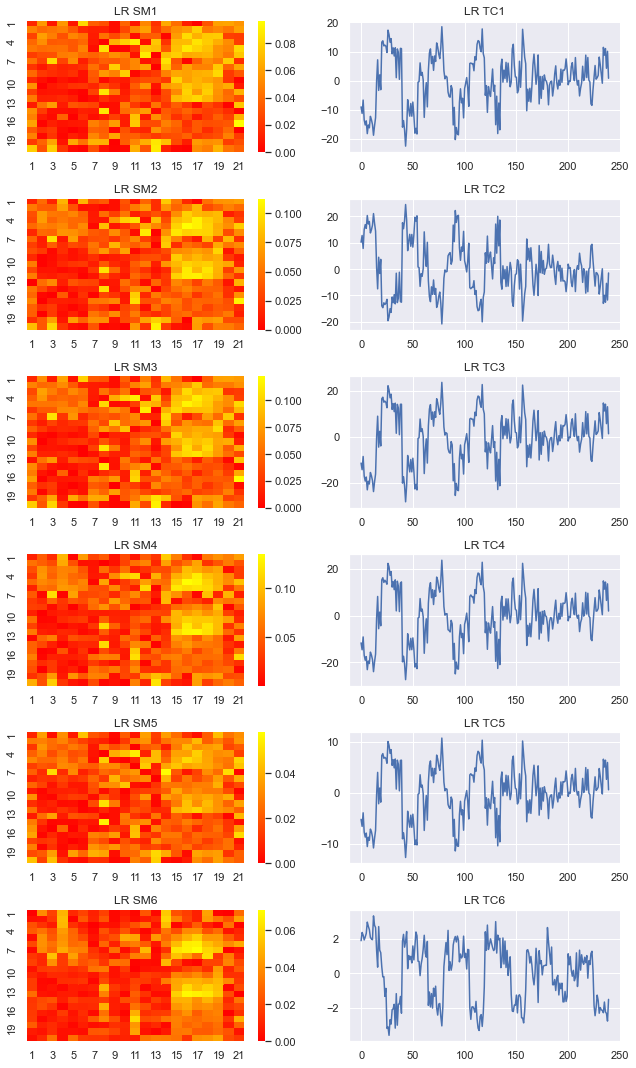

In [15]:
from numpy.linalg import svd 

U, V, W = svd(X_standard, 6)
Z = np.matmul(U, TC)
eigenvalues = np.matmul(V, TC)

# plotting eigenvalues
fig, ax = plt.subplots()
ax.plot(eigenvalues)
ax.set_title("Eigenvalues")
plt.savefig("eigenvalues.png")

# plotting the regressors in Z
fig2, ax2 = plt.subplots(6, 2, figsize = (15, 15))
for i in range(nsrcs):
    ax2[i,0].plot(range(n), Z[:,i])
    ax2[i,0].set_title("PCR TC" + str(i+1))
    ax2[i,1].plot(range(n), TC[:,i])
    ax2[i,1].set_title("source TC" + str(i+1))
plt.tight_layout()
plt.savefig("PCR_source_TCs.png")

# lasso regression with rho = 0.001
rho = 0.001
step = 1/((np.linalg.norm(np.matmul(Z, np.transpose(Z)), ord = 1)) * 1.1)
thr = rho * n * step
Ao = np.zeros((nsrcs))
A = np.zeros((nsrcs))
        
Alr = np.zeros((nsrcs, x1 * x2))
for k in range(x1 * x2):
    A = Ao + (step * np.matmul(np.transpose(Z), (X_standard[:,k] - 
                                                 np.matmul(Z, Ao))))
    A = (1/(1 + thr)) * np.multiply(np.sign(A),
                                 np.maximum(np.zeros(A.shape), np.abs(A) - thr))
    for i in range(10):
        Ao = A
        A = Ao + (step * np.matmul(np.transpose(Z), (X_standard[:,k] - 
                                           np.matmul(Z, Ao))))
        A = (1/(1 + thr)) * np.multiply(np.sign(A),
                                        np.maximum(np.zeros(A.shape), np.abs(A) - thr))
    Alr[:,k] = A
Dlr = np.matmul(X_standard, np.transpose(Alr))

fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (9, 15))
SM_column_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
                        '12', '13', '14', '15', '16', '17', '18', '19', '20',
                        '21']

# Taking the absolute value for simplicity of plotting
A_LR = np.abs(Alr)
A_LR_reshape = np.reshape(A_LR, (6, 21, 21))
A_LR_transpose = np.zeros((nsrcs, 21, 21))
for i in range(nsrcs):
    A_LR_transpose[i] = np.transpose(A_LR_reshape[i])
    A_LR_df = pd.DataFrame(A_LR_transpose[i], columns = SM_column_names)
    A_LR_df.index = A_LR_df.index + 1
    sns.heatmap(A_LR_df, cmap = 'autumn', ax = axes[i,0])
    axes[i,0].set_title("LR SM" + str(i+1))
    axes[i,1].plot(range(n), Dlr[:,i])
    axes[i,1].set_title("LR TC" + str(i+1))

plt.tight_layout()    
plt.savefig("PCR_SM_TC")